##### Checking Working Directory

In [77]:
import os

os.getcwd()

'C:\\Users\\thars\\Downloads\\Insurance-claims-data'

##### Set a Working Dirietory

In [78]:
os.chdir(r"C:\Users\thars\Downloads\Insurance-claims-data")

In [79]:
os.getcwd()

'C:\\Users\\thars\\Downloads\\Insurance-claims-data'

##### Importing  pandas 

In [80]:
import pandas as pd

#load the dataset
data = pd.read_csv("Insurance claims data.csv")

data.head(5)

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


##### Check whether data contains any null

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [82]:
data.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

##### Import librararies

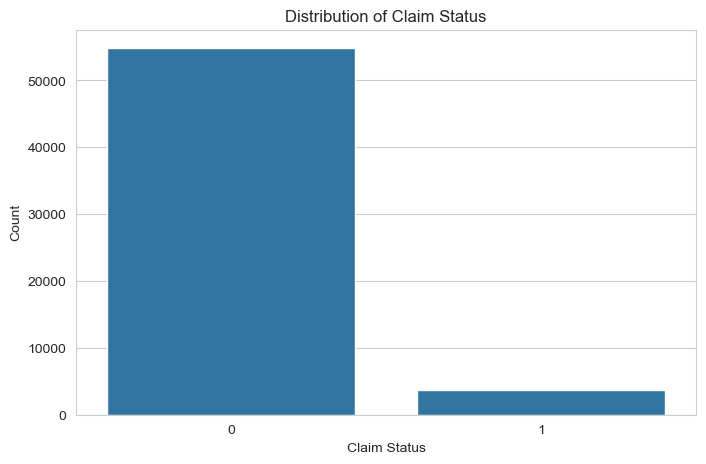

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))

#plot the distribution of the target varible "claim_status"
sns.countplot(x="claim_status", data=data)
plt.title("Distribution of Claim Status")
plt.xlabel("Claim Status")
plt.ylabel("Count")

plt.show()

##### Selecting numerical columns for analysis

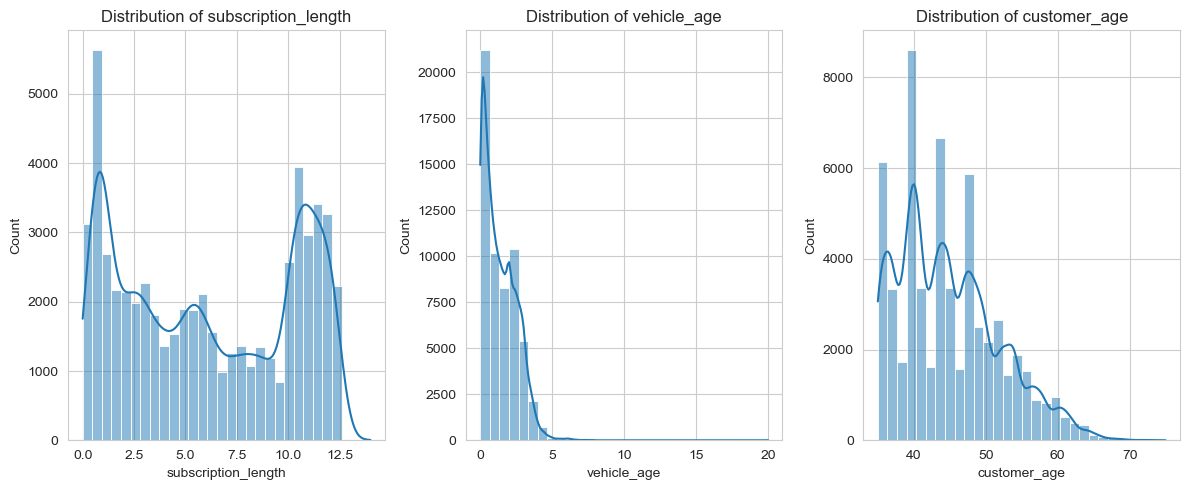

In [84]:
numerical_columns = ["subscription_length", "vehicle_age", "customer_age"]

# plotting distributions of numerical feathers 
plt.figure(figsize=(12, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

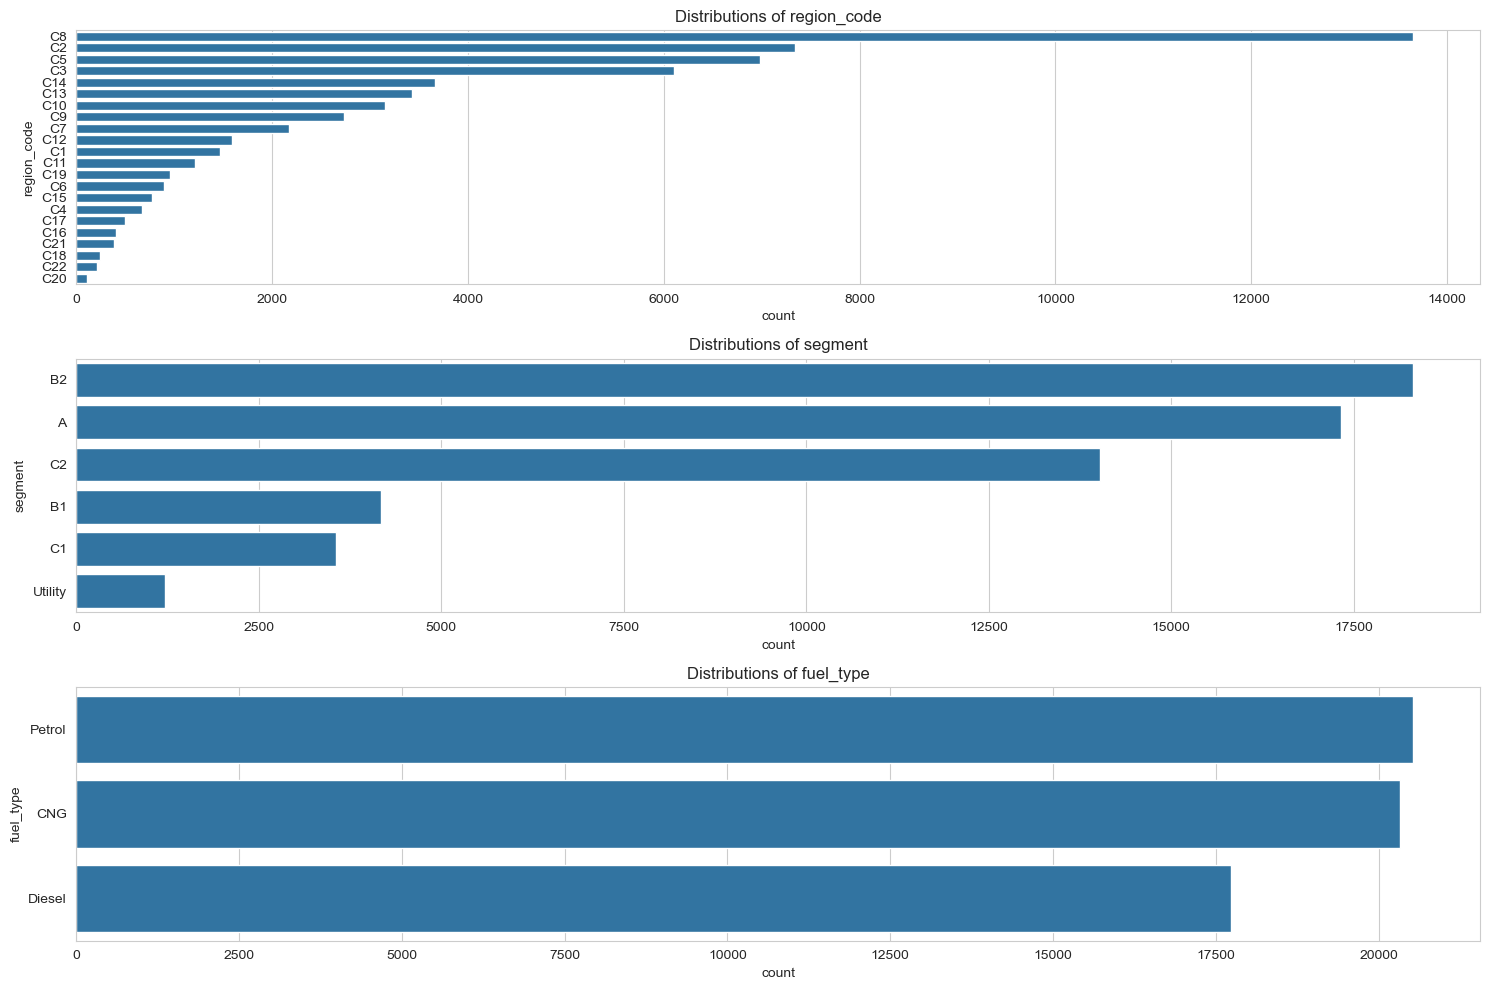

In [85]:
# Selecting some relevent Categorical columns for analysis
categorical_columns = ["region_code", "segment", "fuel_type"]

#plotting distributions of some categorical feathers
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=data, order = data[column].value_counts().index)
    plt.title(f"Distributions of {column}")
    plt.xlabel("count")
    plt.ylabel(column)

plt.tight_layout()
plt.show()

##### Importing sklearn library

In [86]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]

# oversample the minority class
minority_oversample = resample(minority,
                               replace=True,
                               n_samples=len(majority),
                               random_state=42)

# Combine majority class with oversample minority class
oversampled_data = pd.concat([majority, minority_oversample])

# check the distribution of undersample and oversample datasets
oversampled_distributions = oversampled_data.claim_status.value_counts()   #we can use this oversampled_data["claim_status"].value_counts()

oversampled_distributions

claim_status
0    54844
1    54844
Name: count, dtype: int64

##### Plotting the distributins of "customer_age", "vehicle_age" and "subscription_length" with respect to "claim_status"

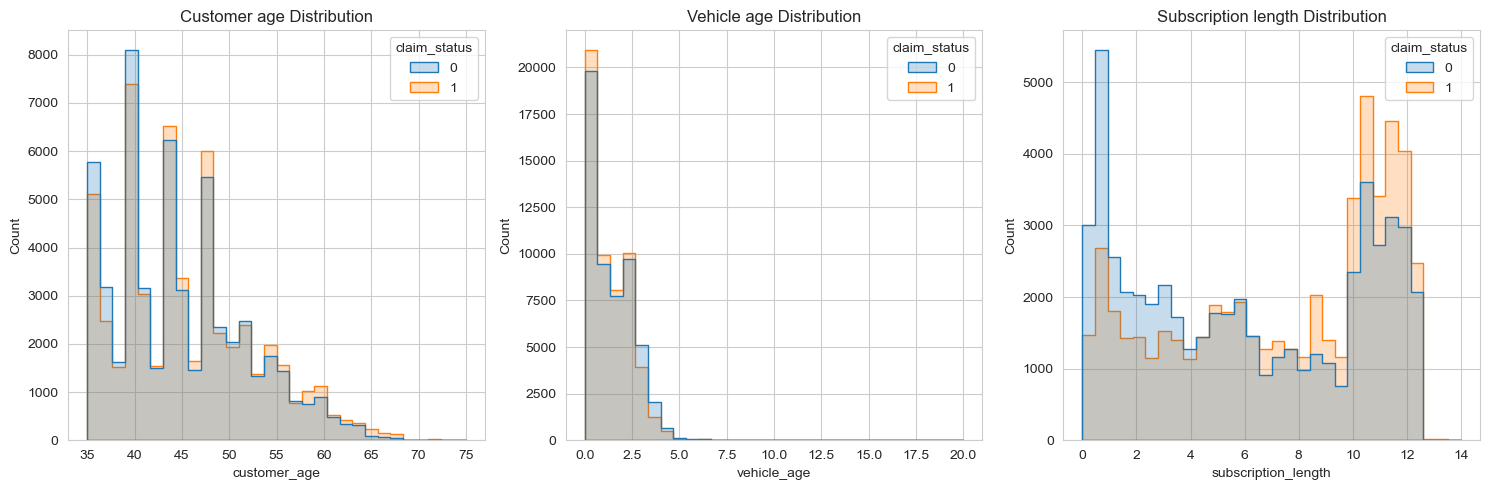

In [87]:
plt.figure(figsize=(15, 5))

# "customer_age" distribution
plt.subplot(1, 3, 1)
sns.histplot(x="customer_age", data=oversampled_data, hue="claim_status",
                bins=30, element="step")
plt.title("Customer age Distribution")

# "vehicle_age" distribution
plt.subplot(1, 3, 2)
sns.histplot(x="vehicle_age", data=oversampled_data, hue="claim_status", 
             bins=30, element="step")
plt.title("Vehicle age Distribution")

# "subscription_length" distribution
plt.subplot(1, 3, 3)
sns.histplot(x="subscription_length", data=oversampled_data, hue= "claim_status",
             bins=30, element="step")
plt.title("Subscription length Distribution")

plt.tight_layout()
plt.show()

#### Feature Selection

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# encode categorical variable
le = LabelEncoder()
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype=="object" else col)

# separate features and target variable
X = encoded_data.drop("claim_status", axis=1)
y = encoded_data["claim_status"]

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# get feature importance

feature_importance = rf_model.feature_importances_

# create dataframe for visualization of feature importance
features_df = pd.DataFrame({"feature":X.columns, "importance":feature_importance})
features_df = features_df.sort_values(by = "importance", ascending=False)

print(features_df.head(10))  #displaying a top 10 important features

                feature  importance
0             policy_id    0.321072
1   subscription_length    0.248309
3          customer_age    0.176639
2           vehicle_age    0.135190
5        region_density    0.053838
4           region_code    0.052649
7                 model    0.000957
24               length    0.000846
26         gross_weight    0.000834
11          engine_type    0.000791


#### Model Training

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# drop 'Policy_id' column from the data
#oversampled_data = oversampled_data.drop('policy_id', axis=1)

# prepare the oversampled data
X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

# encoding categorical columns
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)

# create and train the Random Forest model
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)

# predictions
y_pred = rf_model_oversampled.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



#####

##### Now, let’s label the original imbalanced data using our model to see how many instances are correctly classified from our model

In [98]:
original_encoded = data.drop('policy_id', axis=1).copy()
encoders = {col: LabelEncoder().fit(X_oversampled[col]) for col in X_oversampled.select_dtypes(include=['object']).columns}

for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis=1))

comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

print(comparison_df.head(10))

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          1
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0


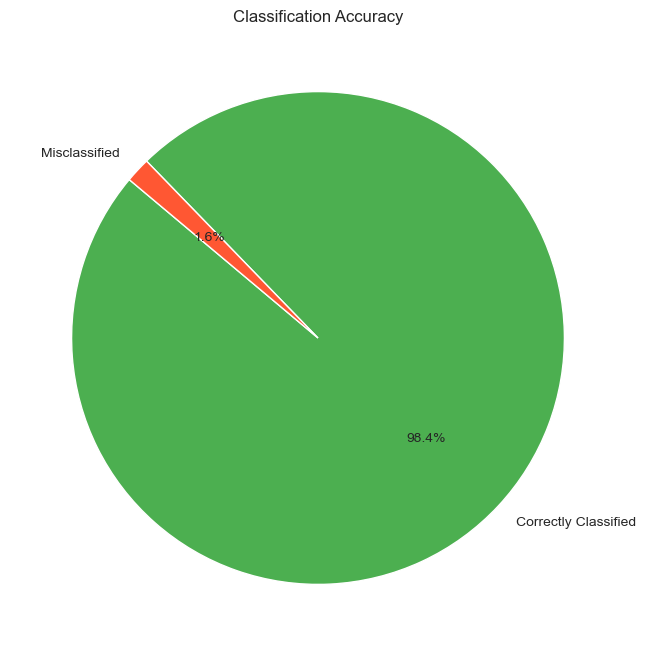

In [117]:
correctly_classified = (comparison_df["Actual"] == comparison_df["Predicted"]).sum()
incorrectly_classified = (comparison_df["Actual"] != comparison_df["Predicted"]).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ["Correctly Classified", "Misclassified"]

#create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=labels, autopct="%1.1f%%", startangle=140, colors=['#4CAF50', '#FF5733'])
plt.title("Classification Accuracy")
plt.show()